In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## CSU Chemistry Theory Group Coding Camp 2022
### Python basics Pt. 2: Data Storage and Manipulation with Pandas

#### Agenda:
* [Storing Data: Static Files vs. SQL databases](#storing-data)
* [Reading Data](#reading-data)
* [Manipulating Data and Basic Statistics](#manipulating-data)
* [Plotting Data](#plotting-data)


## Storing Data: Static Files vs. Databases <a name="storing-data"></a>

We store data in two distinct formats: as static files, and as database objects. While we tend to use two terms interchangeably, they are quite different: static files tend to reside on your local hard disk, while databases are often on a remote server. Crucially, databases maintain concurrency among their entries - namely, they make it safe for multiple "users" to interact with stored data at once. In the context of high performance computing, this allows several parallel worker processes to act on the same dataset at the same time. In contrast, static files can usually only be acted on by one worker at a time, to prevent overwrites and data loss. While static workers are convenient to work with, high throughput workflows frequently necessitate the use of database storage modalities to maintain computational efficiency.

**Database Pros**
- Write and read concurrency
- Easy distributed access makes it possible to have multiple computing resources working on the same dataset. Eg: AWS database 
- For SQL databases: the table schema enforces consistency
- Can handle large production workloads, at scale

**Static File Pros**
- Easy to work with - single lines of code
- Easy to back up

**Database Cons**
- Setup can be involved - behind CSU's firewall, you need ITS involvement
- SQL can be hard to work with

**Static File Cons**
- Versioning can be difficult if your file is large (eg, > 50 MB files can't be uploaded to github)
- Hard to utilize parallel worker processes

---

We're not going to cover working with databases directly in this session - if you need help with them in the future, reach out to Sabari/Shree/Guilian/Yeonjoon.

Things to know about databases:
- They come in two types: SQL and NoSQL. SQL databases have a strict table-like organization - a "schema" that data is organized by. All data in the db needs to follow this schema. NoSQL databases do not have a defining schema, and data can be unstructured - common formats follow JSON-like key-pair relationships
- SQL databases come in several "dialects": MySQL, MariaDB, PostGRES, OracleSQL, MicrosoftSQL, etc. These dialects all have slightly different syntax and run on different port numbers. Know which one you are working with!
- We frequently include database connection parameters as part of our code. If you then upload your code to github, your database parameters are now exposed to the world! Instead, read in database parameters from an external file that you can ommit from version control systems.

---

### Static Files

Static files are the most common data sources we work with in our day-to-day. There are several different type options:

- CSVs: "Comma separated values". As the name suggests, these consist of data in rows, with each data element separated by a comma and each row separated by a newline. The use of the comma as a delimitter is a common convention, but sometimes you'll see the use of a tab separator as well. It's  common practice to zip (compress) these for ease of storage - a .tar.gz extension is common on Unix based systems.
Eg:  
name, group, year  
sabari, kim, 2  
shree, paton, 4  
yeonjoon, kim, postdoc  

- JSON: "Javascript object notation". These consist of nested key-value pairs. Since they have a look similar to a python dictionary, they offer a convenient means to store data that doesn't have a strict tabular structure and has heirarchical relationships. Eg:  
name: sabari  
&ensp;group: kim  
&ensp;year: 2  
name: shree  
&ensp;group: paton  
&ensp;year: 4  
name: yeonjoon  
&ensp;group: kim  
&ensp;year: postdoc  
  
- HDF5: "Heirarchical Data Format V5". This is a relatively newer file format, created to address the limitations of traditional static files. They can handle heterogenous data, can be sliced (the entire file does not need to be loaded into memory for parts to be accessed), and do better with multiple concurrent read/write processes. We won't get these too much here.

## Reading Data <a name="reading-data"></a>

Using the python 'open' built in is useful when you have text data

In [2]:
# Dont do this - the file is kept open, even when you're done reading/writing to it
file_lines = open('mytxt.txt', 'r').readlines()

In [3]:
# Do this instead!
with open('mytxt.txt', 'r') as infile:
    file_lines = infile.readlines()

In [4]:
file_lines

['The quick brown fox jumps over the lazy dog.']

Using python's csv library:

In [5]:
import csv
with open('18_04_2022_updated_DB.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        # do something - this is a big file, so don't print it
        pass

The csv module also has a DictReader object (csv.DictReader) if you want to use key-value pairs:

In [6]:
with open('18_04_2022_updated_DB.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    for row in csv_reader:
        # print(row['SMILES SOLUTE'])
        pass

In general, you'll typically want to load csv data into a DataFrame object in pandas (more on that soon)

In [7]:
df = pd.read_csv('18_04_2022_updated_DB.csv')

Pandas has good documentation - the additional parameters to read_csv can be useful if your file looks weird.  
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

## Manipulating Data <a name="manipulating-data"></a>


Now that we have our dataframe, lets play around with it. First, lets take a look at our dataframe

In [8]:
df

,SMILES SOLUTE,SMILES Solvent 1,SMILES Solvent 2,Mole Fraction Solvent 1,Mole Fraction Solvent 2,Density (g/mL),T (K),log(S),log(Xs),Reference (DOI),Comments,MW,pph(g/100g),DeltaGsolv
0,CCCCCCCC,Cc1ccccn1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,NaN,NaN,-4.73
1,Cc1ccccc1,Cc1ccccn1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,NaN,NaN,-5.06
2,CCO,Cc1ccccn1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,NaN,NaN,-5.01
3,C1COCCO1,Cc1ccccn1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,NaN,NaN,-5.01
4,CCC(C)=O,Cc1ccccn1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,NaN,NaN,-4.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25327,COc1ccc(cc1OC)C(=O)N2CCN(CC2)c3ccc4NC(=O)CCc4c3,c1ccccc1,NaN,1.0,0.0,NaN,298.15,-3.789551538,NaN,10.5281/zenodo.3686212,"From Nat Commun 11, 5753 (2020).",NaN,NaN,NaN
25328,Cc1ccc2[nH]c(Nc3ccccc3)nc2c1,c1ccccc1,NaN,1.0,0.0,NaN,288.15,-2.327158636,NaN,10.5281/zenodo.3686212,"From Nat Commun 11, 5753 (2020).",NaN,NaN,NaN
25329,Cc1ccccc1C(O)=O,c1ccccc1,NaN,1.0,0.0,NaN,294.25,-0.138627526,NaN,10.5281/zenodo.3686212,"From Nat Commun 11, 5753 (2020).",NaN,NaN,NaN
25330,Cc1cc(cc(c1O)[N+]([O-])=O)[N+]([O-])=O,c1ccccc1,NaN,1.0,0.0,NaN,288.15,0.215501725,NaN,10.5281/zenodo.3686212,"From Nat Commun 11, 5753 (2020).",NaN,NaN,NaN


In [9]:
df.head() # Note that this is a function!

,SMILES SOLUTE,SMILES Solvent 1,SMILES Solvent 2,Mole Fraction Solvent 1,Mole Fraction Solvent 2,Density (g/mL),T (K),log(S),log(Xs),Reference (DOI),Comments,MW,pph(g/100g),DeltaGsolv
0,CCCCCCCC,Cc1ccccn1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,NaN,NaN,-4.73
1,Cc1ccccc1,Cc1ccccn1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,NaN,NaN,-5.06
2,CCO,Cc1ccccn1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,NaN,NaN,-5.01
3,C1COCCO1,Cc1ccccn1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,NaN,NaN,-5.01
4,CCC(C)=O,Cc1ccccn1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,NaN,NaN,-4.52


In [10]:
df.head

<bound method NDFrame.head of                                          SMILES SOLUTE SMILES Solvent 1  \
0                                             CCCCCCCC        Cc1ccccn1   
1                                            Cc1ccccc1        Cc1ccccn1   
2                                                  CCO        Cc1ccccn1   
3                                             C1COCCO1        Cc1ccccn1   
4                                             CCC(C)=O        Cc1ccccn1   
...                                                ...              ...   
25327  COc1ccc(cc1OC)C(=O)N2CCN(CC2)c3ccc4NC(=O)CCc4c3         c1ccccc1   
25328                     Cc1ccc2[nH]c(Nc3ccccc3)nc2c1         c1ccccc1   
25329                                  Cc1ccccc1C(O)=O         c1ccccc1   
25330           Cc1cc(cc(c1O)[N+]([O-])=O)[N+]([O-])=O         c1ccccc1   
25331     CN(C)c1ccc(cc1)C(=Nc2ccccc2N)c3ccc(cc3)N(C)C         c1ccccc1   

      SMILES Solvent 2  Mole Fraction Solvent 1  Mole Fraction  Solve

In [11]:
df.shape # This is not a function - its a tuple object of rows x columns

(25332, 14)

In [12]:
print(f'Number of data points: {df.shape[0]*df.shape[1]}')

Number of data points: 354648


Every column in a pandas dataframe is a Series object:

In [13]:
df['SMILES SOLUTE'].head()

0     CCCCCCCC
1    Cc1ccccc1
2          CCO
3     C1COCCO1
4     CCC(C)=O
Name: SMILES SOLUTE, dtype: object

I want a separate dataframe of solutes and solvent SMILES (perhaps to analyze compound diversity in my dataset): 

In [14]:
compound_df = df[['SMILES SOLUTE', 'SMILES Solvent 1', 'SMILES Solvent 2']]
compound_df

,SMILES SOLUTE,SMILES Solvent 1,SMILES Solvent 2
0,CCCCCCCC,Cc1ccccn1,NaN
1,Cc1ccccc1,Cc1ccccn1,NaN
2,CCO,Cc1ccccn1,NaN
3,C1COCCO1,Cc1ccccn1,NaN
4,CCC(C)=O,Cc1ccccn1,NaN
...,...,...,...
25327,COc1ccc(cc1OC)C(=O)N2CCN(CC2)c3ccc4NC(=O)CCc4c3,c1ccccc1,NaN
25328,Cc1ccc2[nH]c(Nc3ccccc3)nc2c1,c1ccccc1,NaN
25329,Cc1ccccc1C(O)=O,c1ccccc1,NaN
25330,Cc1cc(cc(c1O)[N+]([O-])=O)[N+]([O-])=O,c1ccccc1,NaN


Notice that there are a lot of NaN values in the dataframe - these are 'not a number', representing a null value. Let's count how many multi-solvent systems we have using the notna function:

In [15]:
multi_compound_mask = compound_df['SMILES Solvent 2'].notna()
multi_compound_mask

0        False
1        False
2        False
3        False
4        False
         ...  
25327    False
25328    False
25329    False
25330    False
25331    False
Name: SMILES Solvent 2, Length: 25332, dtype: bool

In [16]:
print(f'There are {sum(multi_compound_mask)} multi-solvent systems')

There are 9023 multi-solvent systems


Let's use the notna feature to select the single solvent systems from our original dataframe:

In [17]:
single_df = df[df['SMILES Solvent 2'].isna()]
single_df

,SMILES SOLUTE,SMILES Solvent 1,SMILES Solvent 2,Mole Fraction Solvent 1,Mole Fraction Solvent 2,Density (g/mL),T (K),log(S),log(Xs),Reference (DOI),Comments,MW,pph(g/100g),DeltaGsolv
0,CCCCCCCC,Cc1ccccn1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,NaN,NaN,-4.73
1,Cc1ccccc1,Cc1ccccn1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,NaN,NaN,-5.06
2,CCO,Cc1ccccn1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,NaN,NaN,-5.01
3,C1COCCO1,Cc1ccccn1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,NaN,NaN,-5.01
4,CCC(C)=O,Cc1ccccn1,NaN,1.0,0.0,NaN,NaN,NaN,NaN,10.13020/3eks-j059,From Minnesota Solvation Database (MNSOL) vers...,NaN,NaN,-4.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25327,COc1ccc(cc1OC)C(=O)N2CCN(CC2)c3ccc4NC(=O)CCc4c3,c1ccccc1,NaN,1.0,0.0,NaN,298.15,-3.789551538,NaN,10.5281/zenodo.3686212,"From Nat Commun 11, 5753 (2020).",NaN,NaN,NaN
25328,Cc1ccc2[nH]c(Nc3ccccc3)nc2c1,c1ccccc1,NaN,1.0,0.0,NaN,288.15,-2.327158636,NaN,10.5281/zenodo.3686212,"From Nat Commun 11, 5753 (2020).",NaN,NaN,NaN
25329,Cc1ccccc1C(O)=O,c1ccccc1,NaN,1.0,0.0,NaN,294.25,-0.138627526,NaN,10.5281/zenodo.3686212,"From Nat Commun 11, 5753 (2020).",NaN,NaN,NaN
25330,Cc1cc(cc(c1O)[N+]([O-])=O)[N+]([O-])=O,c1ccccc1,NaN,1.0,0.0,NaN,288.15,0.215501725,NaN,10.5281/zenodo.3686212,"From Nat Commun 11, 5753 (2020).",NaN,NaN,NaN


Now, we can use the loc function to select rows and columns:

In [18]:
# Change the index from just a random number to the solute smiles first
single_df = single_df.set_index(single_df['SMILES SOLUTE'])

In [19]:
octane = single_df.loc[['CCCCCCCC'], ['SMILES Solvent 1', 'DeltaGsolv']]
octane

,SMILES Solvent 1,DeltaGsolv
SMILES SOLUTE,,
CCCCCCCC,Cc1ccccn1,-4.73
CCCCCCCC,CC(O)=O,-3.93
CCCCCCCC,CC#N,-3.57
CCCCCCCC,CC(=O)c1ccccc1,-4.24
CCCCCCCC,Nc1ccccc1,-3.48
CCCCCCCC,COc1ccccc1,-4.62
CCCCCCCC,c1ccccc1,-5.35
CCCCCCCC,N#Cc1ccccc1,-4.34
CCCCCCCC,OCc1ccccc1,-3.77


## Plotting Data <a name="manipulating-data"></a>

Generate a quick scatter plot (from Pandas)

The pandas plotting functions use matplotlib as a backend - that's why the plt.show function works.

Working with matplotlib directly is more complicated, but results in better figures. 

/home/sabari/anaconda3/envs/tf2-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


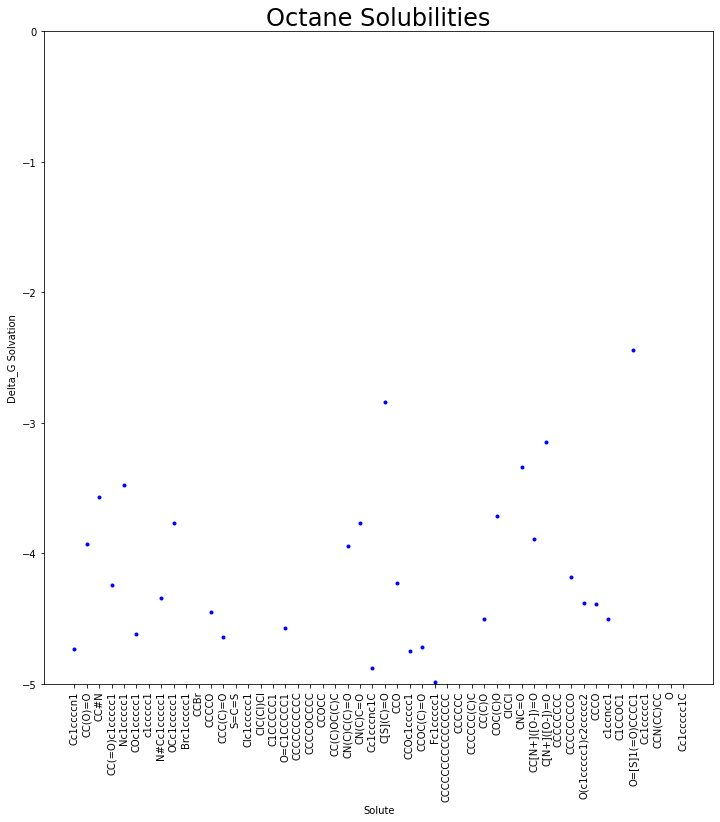

In [20]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111,)
_ = plt.plot(octane['SMILES Solvent 1'], octane['DeltaGsolv'], '.', color='b', ms=6)
ax.set_ylim([-5, 0])
ax.set_xticklabels(octane['SMILES Solvent 1'], rotation = 90)

ax.set_title('Octane Solubilities', fontsize = 24)
ax.set_xlabel('Solute')
ax.set_ylabel('Delta_G Solvation')
plt.savefig('./OctaneDeltaG.png')

Lets try plotting two subplots at once. First, lets grab some data:

In [23]:
heptane = single_df.loc[['CCCCCCC'], ['SMILES Solvent 1', 'DeltaGsolv']]
heptane

,SMILES Solvent 1,DeltaGsolv
SMILES SOLUTE,,
CCCCCCC,CCCCCCC,-4.65
CCCCCCC,CCCCCCCCCCCCCCCC,-4.33
CCCCCCC,CCCCCCCCCCCCCCCCI,-3.90
CCCCCCC,CCCCCCCCO,-3.74
CCCCCCC,O,2.62
CCCCCCC,O,NaN


/home/sabari/anaconda3/envs/tf2-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/sabari/anaconda3/envs/tf2-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


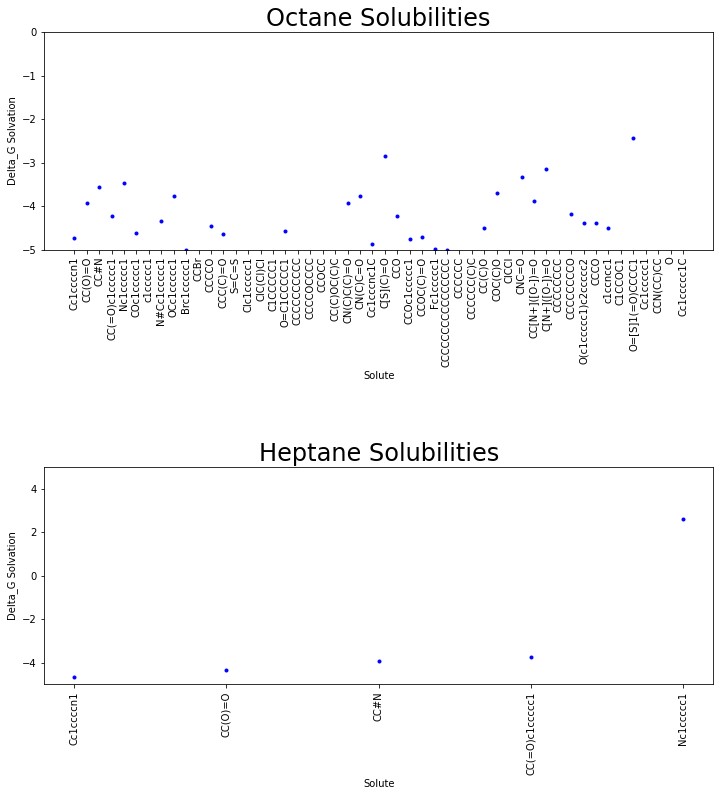

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(12,12))
fig.subplots_adjust(hspace=1)

ax1.plot(octane['SMILES Solvent 1'], octane['DeltaGsolv'], '.', color='b', ms=6)
ax1.set_ylim([-5, 0])
ax1.set_xticklabels(octane['SMILES Solvent 1'], rotation = 90)

ax1.set_title('Octane Solubilities', fontsize = 24)
ax1.set_xlabel('Solute')
ax1.set_ylabel('Delta_G Solvation')


ax2.plot(heptane['SMILES Solvent 1'], heptane['DeltaGsolv'], '.', color='b', ms=6)
ax2.set_ylim([-5, 5])
ax2.set_xticklabels(octane['SMILES Solvent 1'], rotation = 90)

ax2.set_title('Heptane Solubilities', fontsize = 24)
ax2.set_xlabel('Solute')
ax2.set_ylabel('Delta_G Solvation')
plt.savefig('./OctaneHeptaneDeltaG.png')

Finally, lets take a look at the most common solutes:

<AxesSubplot:>

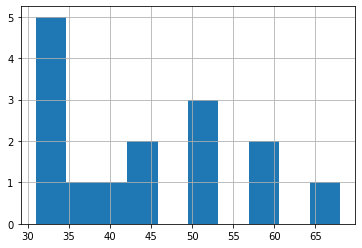

In [47]:
solute_binned = single_df['SMILES SOLUTE'].value_counts()
solute_binned[:15].hist()

In [52]:
solute_binned.to_frame()

,SMILES SOLUTE
CCO,68
Cc1ccccc1,60
CCC(C)=O,57
C[N+]([O-])=O,53
CCCCCCCC,51
...,...
OCC[S](O)(=O)=O,1
CC(O)CC(C)(C)O,1
CCO[P](=O)(OCC)O[P](=O)(OCC)OCC,1
NC(=O)OCC(Cl)(Cl)Cl,1


That's an ugly figure - lets make a better one.

/home/sabari/anaconda3/envs/tf2-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


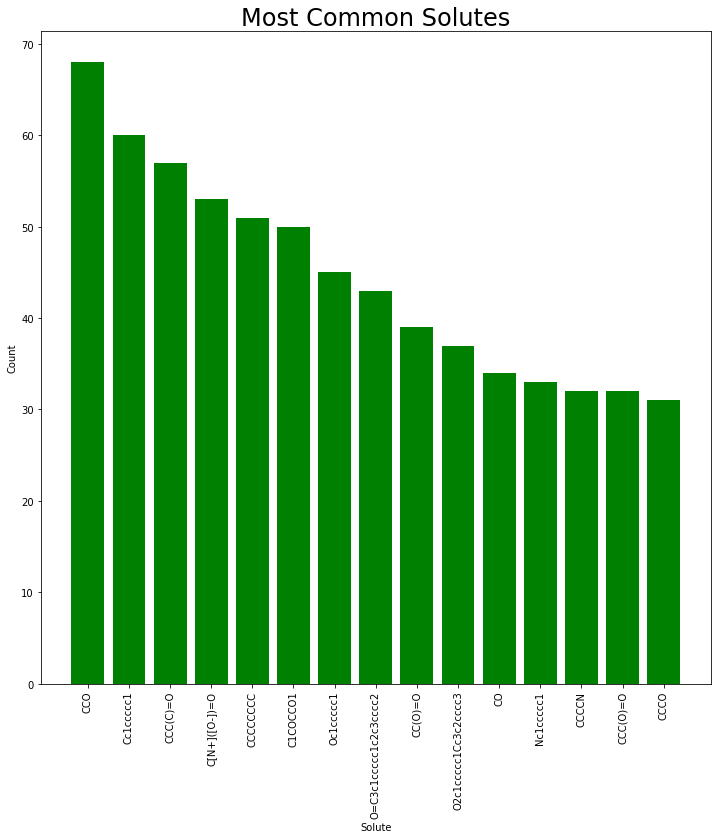

In [60]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.bar(solute_binned[:15].to_frame().index, solute_binned[:15].to_frame()['SMILES SOLUTE'], align='center', color = 'g')
ax.set_xticklabels(solute_binned[:15].to_frame().index, rotation = 90)
ax.set_title('Most Common Solutes', fontsize = 24)
ax.set_xlabel('Solute')
ax.set_ylabel('Count')
plt.savefig('./MostCommonSolutes.pdf')